In [67]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from sklearn import svm
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score, make_scorer

# Load Data

In [75]:
# Scaled
X_train = pd.read_pickle('./datasets/heart_disease/X_train_scaled.pkl')
y_train = pd.read_pickle('./datasets/heart_disease/y_train_scaled.pkl')
X_test = pd.read_pickle('./datasets/heart_disease/X_test_scaled.pkl')
y_test = pd.read_pickle('./datasets/heart_disease/y_test_scaled.pkl')

In [76]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
378,1.753540,1,2,0.403985,-1.850065,1.894070,0,0.793140,1,1.055374,1
356,-0.817871,1,2,-0.950506,-1.850065,-0.527964,0,-0.924506,1,0.577847,1
738,1.217829,0,1,1.487578,1.498941,-0.527964,2,0.558916,0,-0.090691,0
85,1.324972,1,2,0.403985,-0.556976,-0.527964,0,-1.666216,1,0.100320,1
427,0.574977,1,2,0.403985,-1.850065,-0.527964,1,-0.768356,1,0.100320,1


# Train SVM

### Baseline

Validation Accuracy: 0.895
Test Accuracy: 0.837
F1 Score: 0.862


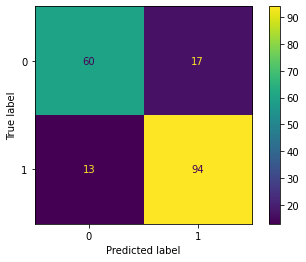

In [55]:
# Baseline model
clf = svm.SVC(random_state=0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Print accuracy
print(f'Validation Accuracy: {clf.score(X_train, y_train):.3f}')
print(f'Test Accuracy: {clf.score(X_test, y_test):.3f}')
print(f'F1 Score: {f1_score(y_test, y_pred):.3f}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()

# Grid Search

In [ ]:
parameters = {
    'kernel': ['poly'],
    'C': [2**i for i in range(-5, 16)],
    'gamma': [2**i for i in range(-15, 4)],
    'degree': [2, 3],
}

svc = svm.SVC(random_state=0)

start_time = time.time()

clf = GridSearchCV(estimator=svc, 
                   param_grid=parameters, 
                   scoring='f1',
                   verbose=1,
                   n_jobs=-1).fit(X_train, y_train)

df = pd.DataFrame(clf.cv_results_)
df.tail()
df.to_csv('./results/hd/results_hd_svm1.csv', index=False)

print(f'Runtime:{time.time() - start_time}')
print(f'Best Score: {clf.best_score_:.3f}')
print('Best Parameters')
print(clf.best_params_)

y_pred = clf.predict(X_test)

# Print accuracy
print(f'Validation Accuracy: {clf.score(X_train, y_train):.3f}')
print(f'Test Accuracy: {clf.score(X_test, y_test):.3f}')
print(f'F1 Score: {f1_score(y_test, y_pred):.3f}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()

# Final Graphs

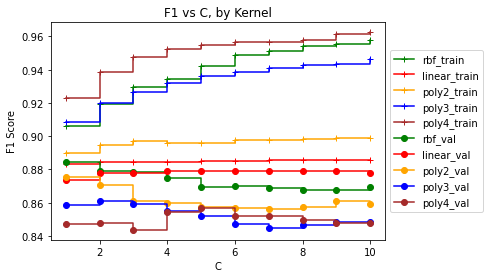

In [65]:
rbf_train = []
rbf_test = []
linear_train = []
linear_test = []
poly2_train = []
poly2_test = []
poly3_train = []
poly3_test = []
poly4_train = []
poly4_test = []
sigmoid_train = []
sigmoid_test = []

kernels = [['rbf', rbf_train, rbf_test],
           ['linear', linear_train, linear_test],
           ['poly2', poly2_train, poly2_test],
           ['poly3', poly3_train, poly3_test],
           ['poly4', poly4_train, poly4_test],
           ['sigmoid', sigmoid_train, sigmoid_test]]

# Max C
max_c = 11

for thing in kernels:
    kernel, train, test = thing
    plot_name = kernel
    if kernel == 'poly2':
        kernel = 'poly'
        deg = 2
    elif kernel == 'poly3':
        kernel = 'poly'
        deg = 3
    elif kernel == 'poly4':
        kernel = 'poly'
        deg = 4
    else:
        deg = 1
    
    for i in range(1, max_c):
        scores = cross_validate(estimator=svm.SVC(C=i,
                                                  kernel=kernel,
                                                  degree=deg,
                                                  random_state=0),
                                X=X_train, 
                                y=y_train,
                                scoring='f1',
                                return_train_score=True,
                                return_estimator=True,
                                n_jobs=-1)

        # Append scores
        train.append(scores['train_score'].mean())
        test.append(scores['test_score'].mean())
        

# Plot Scores
fig, ax = plt.subplots()
ax.set_xlabel('C')
ax.set_ylabel('F1 Score')
ax.set_title('F1 vs C, by Kernel')

#Training
ax.plot(list(range(1,max_c)), rbf_train, marker="+", label="rbf_train", c='green', drawstyle="steps-post")
ax.plot(list(range(1,max_c)), linear_train, marker="+", label="linear_train", c='red', drawstyle="steps-post")
ax.plot(list(range(1,max_c)), poly2_train, marker="+", label="poly2_train", c='orange', drawstyle="steps-post")
ax.plot(list(range(1,max_c)), poly3_train, marker="+", label="poly3_train", c='blue', drawstyle="steps-post")
ax.plot(list(range(1,max_c)), poly4_train, marker="+", label="poly4_train", c='brown', drawstyle="steps-post")
#ax.plot(list(range(1,max_c)), sigmoid_train, marker="+", label="sigmoid_train", drawstyle="steps-post")

# Validation
ax.plot(list(range(1,max_c)), rbf_test, marker="o", label="rbf_val", c='green', drawstyle="steps-post")
ax.plot(list(range(1,max_c)), linear_test, marker="o", label="linear_val", c='red', drawstyle="steps-post")
ax.plot(list(range(1,max_c)), poly2_test, marker="o", label="poly2_val", c='orange', drawstyle="steps-post")
ax.plot(list(range(1,max_c)), poly3_test, marker="o", label="poly3_val", c='blue', drawstyle="steps-post")
ax.plot(list(range(1,max_c)), poly4_test, marker="o", label="poly4_val", c='brown', drawstyle="steps-post")
#ax.plot(list(range(1,max_c)), sigmoid_test, marker="o", label="sigmoid_val", drawstyle="steps-post")

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

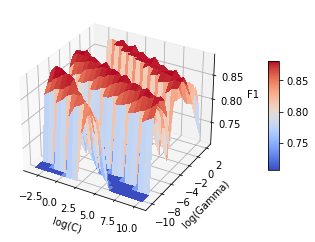

In [69]:
rbf_train = []
rbf_test = []
linear_train = []
linear_test = []
poly2_train = []
poly2_test = []
poly3_train = []
poly3_test = []
poly4_train = []
poly4_test = []

kernels = [['rbf', rbf_train, rbf_test]]

# Max C
Cs = [2**i for i in range(-5, 16)]
gammas = [2**i for i in range(-15, 4)]

for thing in kernels:
    kernel, train, test = thing
    
    #for i in range(1, max_c):
    for i in Cs:
        for g in gammas:
            scores = cross_validate(estimator=svm.SVC(C=i,
                                                      gamma=g,
                                                      kernel=kernel,
                                                      class_weight=None,
                                                      random_state=0),
                                    X=X_train, 
                                    y=y_train,
                                    scoring='f1',
                                    return_train_score=True,
                                    return_estimator=True,
                                    n_jobs=-1)

            # Append scores
            train.append(scores['train_score'].mean())
            test.append(scores['test_score'].mean())

# Shape data for 3d plot
X, Y = np.meshgrid(Cs, gammas)
Z = np.reshape(rbf_test, X.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, facecolor='white')
#ax.set_facecolor('white')

# Plot the surface
surface = ax.plot_surface(np.log(X), np.log(Y), Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add axis labels
ax.set_xlabel('log(C)')
ax.set_ylabel('log(Gamma)')
ax.set_zlabel('F1')

# Color bar
fig.colorbar(surface, shrink=0.5, aspect=10, pad=0.13)

# Save plot
plt.savefig('./plots/graph_hd.png')
        